# Final Exam

### __Introduction__
Congratulations you've landed a data science job at Riot Games (https://en.wikipedia.org/wiki/Riot_Games) whether you know what they do or not.

Riot makes several games including the extremely popular online game League of Legends (https://en.wikipedia.org/wiki/League_of_Legends). You've been assigned to the League of Legends team to help analyze their data. 

*From here on we will refer to League of Legends as just "League".

### __Background__

_In the game, two teams of five players battle in player-versus-player combat, each team occupying and defending their half of the map. Each of the ten players controls a character, known as a "champion", with unique abilities and differing styles of play. During a match, champions become more powerful by collecting experience points, earning gold, and purchasing items to defeat the opposing team. In League's main mode, Summoner's Rift, a team wins by pushing through to the enemy base and destroying their "Nexus", a large structure located within._ (wikipedia)

The two teams are the red team and the blue team.

In League there are different "tiers" of players called "leagues". New and unskilled players (sorry) are in __Bronze__ league while relatively skilled players are in __Diamond__ league.

*we will refer to a player in diamond league as a diamond player and a player in bronze league as a bronze player

### __Your job__
Investigate the differences between bronze players and diamond players. Presumably, bronze players and diamond players will play the game somewhat differently due to their relative skill difference. However, we dont expect there to be huge differences since bronze players may try to imitate diamond players in order to get better at the gane.

We want to know 
1. Are there are any systematic differences in the way bronze players and diamond players approach the game?
2. Do bronze league games and diamond league games play out the same? 

### __Data__
There are 8 provided datasets. Each row of each dataset records information from one match up to a certain point time (15, 20, 25, or 30 minutes)

For example 
 - `timeline_DIAMOND_15.csv` contains match data up to 15 minutes into the game for diamond players. 
 - `timeline_BRONZE_30.csv` contains match data up to 30 minutes into the game for bronze players. 

We will be using all datasets to look at differences between bronze and diamond players over the course of the game.

### __Task__

Using the provided data we will compare the gameplay of bronze and diamond players at five stages of the game. 
1. Stage 1 is the 15 minute mark
2. Stage 2 is the 20 minute mark
2. Stage 3 is the 25 minute mark 
2. Stage 4 is the 30 minute mark

We will try to discover how features differ between the two groups and which features are important to predicting the winner of the game.


### __Rules__
This exam works much like the homework. Code everything that is asked of you and fill in any boxes where it asks for your commentary or opinion. 

This exam has two parts
1. Manipule and plot data. Draw conclusions.
2. Build classification models. Compare them. Draw conclusions.

Guidelines
- You may use your notes, old homeworks, google, etc.
- You may not ask your friends for help 
- If you see `...` that indicates you need to fill something in or write code.
- Run all code chunks before submitting. Make sure the output is unambigious. 
- When you are finished re-upload to Canvas.

glhf



In [1]:
# standard imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# score classifiers

from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Question 1 -- Exploratory Analysis

Lets assume we dont know anything about league. We have never played the game, never seen anyone play it, and maybe we haven't even heard of it. Thats okay, we can still analyze the data and try to learn something.


First things first, we want to do some exploratory analysis. This will help us identify consistent trends between bronze and diamond players and become familiar with the data. 

In [3]:
# as always change the drive to your drive

#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/stat335fall22/Exams/Final

## Part a [10 pts]

Through a little investigation you find out there are some key metrics people keep track of to tell whos currently winning. We will look at three of them here.

1. The amount of "xp" earned by each team.  A team with more "xp" is typically stronger than a team with less "xp". Basically more xp is better.
2. The amount of "gold" earned by each team. A team with more gold typically has better equipment than a team with less gold. Basically more gold is better.
3. The number of "wards" placed by each team. A team with more wards can react to the opposing team better. Basically more wards is better.


Using the data available up to 15 minutes in the game, compare the distribution of xp, gold, and wards for bronze and diamond players.

1. Create 9 subfigures in a 3x3 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_gold, red_gold, gold_diff, blue_xp, red_xp, xp_diff, blue_ward_placed, red_ward_placed, ward_placed_diff. These variables record the amount of gold, xp, and wards each team (red or blue) has and the difference. 
3. In each subfigure plot two histograms: one for diamond players and one for bronze players. Make each histogram transparent (alpha = 0.5) since they will overlap. Label each histogram.
4. Comment on any similarities or differences between the two histograms (within each subfigure) and any differences you notice overall between diamond and bronze players. Make sure to answer: Do bronze or diamond players tend to have more xp, gold, and wards (for either team)? Is there any systematic difference between red and blue team (for either diamond or bronze)? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.



In [4]:
#bronze15 contains bronze league match data up to 15 minutes into the game
bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)

#diamond15 contains diamond league match data up to 15 minutes into the game
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)

In [5]:
# check column names (should be the same for both datasets)
bronze15.columns

Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff',
       'blue_ward_destroyed', 'red_ward_destroyed', 'ward_destroyed_diff',
       'first_blood', 'blue_kills', 'red_kills', 'kill_diff', 'first_turret',
       'blue_turrets', 'red_turrets', 'turret_diff', 'first_inhibitor',
       'blue_inhibitors', 'red_inhibitors', 'inhibitor_diff', 'first_herald',
       'blue_heralds', 'red_heralds', 'herald_diff', 'first_baron',
       'blue_barons', 'red_barons', 'baron_diff', 'blue_air', 'red_air',
       'air_diff', 'blue_hextech', 'red_hextech', 'hextech_diff', 'blue_fire',
       'red_fire', 'fire_diff', 'blue_earth', 'red_earth', 'earth_diff',
       'blue_water', 'red_water', 'water_diff', 'air', 'hextech', 'fire',
       'earth', 'water', 'blue_win'],
      dtype='object')

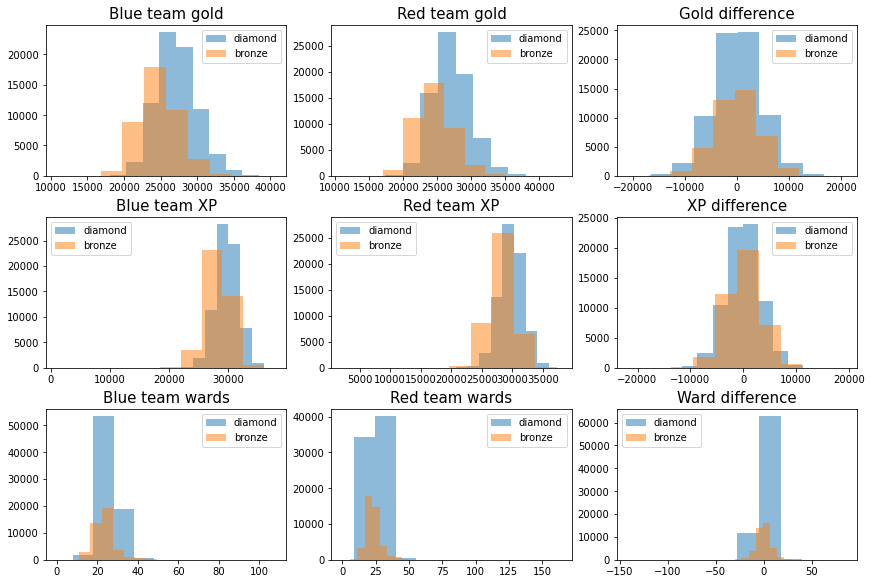

In [6]:
fig, ax = plt.subplots(3, 3, constrained_layout = True, figsize = (12, 8))

# gold histograms
ax[0,0].set_title('Blue team gold', fontsize = 15)
ax[0,0].hist(diamond15['blue_gold'], label = 'diamond', alpha = 0.5)
ax[0,0].hist(bronze15['blue_gold'], label = 'bronze', alpha = 0.5)
ax[0,0].legend()

ax[0,1].set_title('Red team gold', fontsize = 15)
ax[0,1].hist(diamond15['red_gold'], label = 'diamond', alpha = 0.5)
ax[0,1].hist(bronze15['red_gold'], label = 'bronze', alpha = 0.5)
ax[0,1].legend()


ax[0,2].set_title('Gold difference', fontsize = 15)
ax[0,2].hist(diamond15['gold_diff'], label = 'diamond', alpha = 0.5)
ax[0,2].hist(bronze15['gold_diff'], label = 'bronze', alpha = 0.5)
ax[0,2].legend()

# XP histograms

ax[1,0].set_title('Blue team XP', fontsize = 15)
ax[1,0].hist(diamond15['blue_xp'], label = 'diamond', alpha = 0.5)
ax[1,0].hist(bronze15['blue_xp'], label = 'bronze', alpha = 0.5)
ax[1,0].legend()

ax[1,1].set_title('Red team XP', fontsize = 15)
ax[1,1].hist(diamond15['red_xp'], label = 'diamond', alpha = 0.5)
ax[1,1].hist(bronze15['red_xp'], label = 'bronze', alpha = 0.5)
ax[1,1].legend()

ax[1,2].set_title('XP difference', fontsize = 15)
ax[1,2].hist(diamond15['xp_diff'], label = 'diamond', alpha = 0.5)
ax[1,2].hist(bronze15['xp_diff'], label = 'bronze', alpha = 0.5)
ax[1,2].legend()


# Ward histograms
ax[2,0].set_title('Blue team wards', fontsize = 15)
ax[2,0].hist(diamond15['blue_ward_placed'], label = 'diamond', alpha = 0.5)
ax[2,0].hist(bronze15['blue_ward_placed'], label = 'bronze', alpha = 0.5)
ax[2,0].legend()

ax[2,1].set_title('Red team wards', fontsize = 15)
ax[2,1].hist(diamond15['red_ward_placed'], label = 'diamond', alpha = 0.5)
ax[2,1].hist(bronze15['red_ward_placed'], label = 'bronze', alpha = 0.5)
ax[2,1].legend()

ax[2,2].set_title('Ward difference', fontsize = 15)
ax[2,2].hist(diamond15['ward_placed_diff'], label = 'diamond', alpha = 0.5)
ax[2,2].hist(bronze15['ward_placed_diff'], label = 'bronze', alpha = 0.5)
ax[2,2].legend()

plt.show()

When it comes to XP, the difference between diamond and bronze players is slight for both blue and red teams. With gold there is a noticable difference between gold obtained in matches between diamond and bronze players for both blue and red teams. Finally for wards obtained throughout a match, there does not seem to be much difference between diamond and bronze players for both teams. Overall, it seems like diamond players are able to obtain more gold and xp throughout a game. This makes sense since diamond players are more experienced and should have a better time obtaining resources. However, it does not seems like there is not much systematic difference between red and blue teams as the histograms between the red and blue teams look pretty similar. There should not be any real differences between teams since the players should all be around the same level no matter what team they are in.  

## Part b  [10 pts]

We suspect that the amount of gold earned may be the most important variable.
Lets compare the gold distribution across match lengths for bronze and diamond players. 

In [7]:
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('data/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('data/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('data/timeline_DIAMOND_30.csv', index_col = 0)

bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('data/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('data/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('data/timeline_BRONZE_30.csv', index_col = 0)

Using the data available up to 15, 20, 25 and 30 minutes into the game, compare the distribution of gold for bronze and diamond players.

1. Create 12 subfigures in a 4x3 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_gold, red_gold, gold_diff
3. In each subfigure plot two histograms: one for diamond players and one for bronze players. Make each histogram transparent (alpha = 0.5) since they will overlap. Label the histograms.
5. Create table that clearly displays the mean of each histogram for each of the twelve subfigures. The table should be 12x3, each row is a subfigure, column 1 contains the title of the subfigure, column 2 contains the bronze mean, and column 3 contains the diamond mean.
4. Comment on any similarities or differences between the two histograms (within each subfigure) and any differences you notice overall between diamond and bronze players.  Make sure to answer: Do bronze or diamond players tend to have more gold (for either team)? Does the gap between bronze and diamond grow with match length? Is there any systematic difference between red and blue team (for either diamond or bronze)? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.



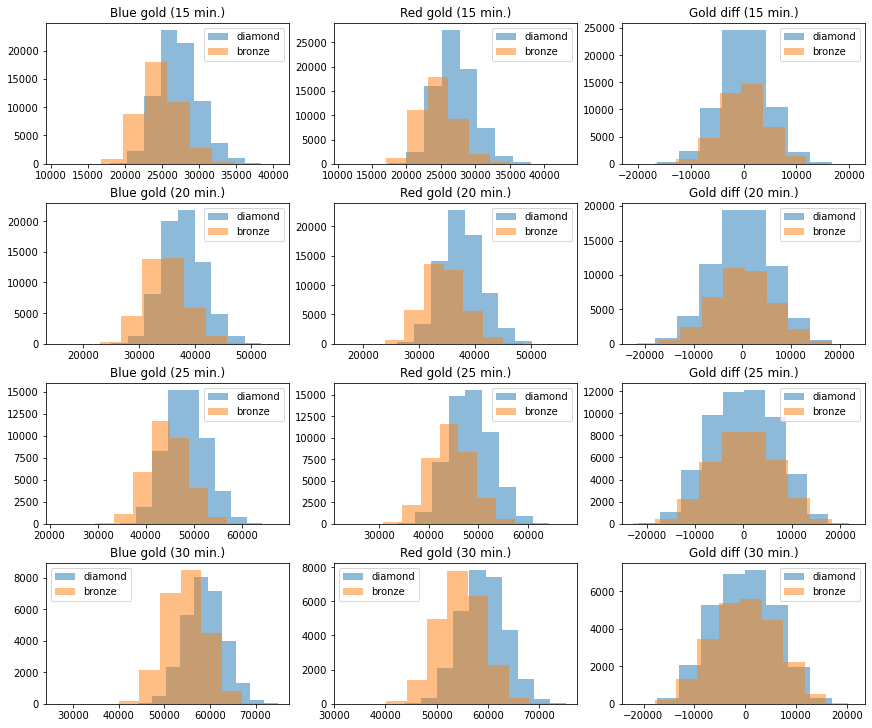

In [8]:
fig, ax = plt.subplots(4, 3, constrained_layout = True, figsize = (12, 10))

# Gold histograms (15 min)
ax[0,0].set_title('Blue gold (15 min.)')
ax[0,0].hist(diamond15['blue_gold'], label = 'diamond', alpha = 0.5)
ax[0,0].hist(bronze15['blue_gold'], label = 'bronze', alpha = 0.5)
ax[0,0].legend()

ax[0,1].set_title('Red gold (15 min.)')
ax[0,1].hist(diamond15['red_gold'], label = 'diamond', alpha = 0.5)
ax[0,1].hist(bronze15['red_gold'], label = 'bronze', alpha = 0.5)
ax[0,1].legend()

ax[0,2].set_title('Gold diff (15 min.)')
ax[0,2].hist(diamond15['gold_diff'], label = 'diamond', alpha = 0.5)
ax[0,2].hist(bronze15['gold_diff'], label = 'bronze', alpha = 0.5)
ax[0,2].legend()

# Gold histograms (20 min)
ax[1,0].set_title('Blue gold (20 min.)')
ax[1,0].hist(diamond20['blue_gold'], label = 'diamond', alpha = 0.5)
ax[1,0].hist(bronze20['blue_gold'], label = 'bronze', alpha = 0.5)
ax[1,0].legend()

ax[1,1].set_title('Red gold (20 min.)')
ax[1,1].hist(diamond20['red_gold'], label = 'diamond', alpha = 0.5)
ax[1,1].hist(bronze20['red_gold'], label = 'bronze', alpha = 0.5)
ax[1,1].legend()

ax[1,2].set_title('Gold diff (20 min.)')
ax[1,2].hist(diamond20['gold_diff'], label = 'diamond', alpha = 0.5)
ax[1,2].hist(bronze20['gold_diff'], label = 'bronze', alpha = 0.5)
ax[1,2].legend()

# Gold histograms (25 min)
ax[2,0].set_title('Blue gold (25 min.)')
ax[2,0].hist(diamond25['blue_gold'], label = 'diamond', alpha = 0.5)
ax[2,0].hist(bronze25['blue_gold'], label = 'bronze', alpha = 0.5)
ax[2,0].legend()

ax[2,1].set_title('Red gold (25 min.)')
ax[2,1].hist(diamond25['red_gold'], label = 'diamond', alpha = 0.5)
ax[2,1].hist(bronze25['red_gold'], label = 'bronze', alpha = 0.5)
ax[2,1].legend()

ax[2,2].set_title('Gold diff (25 min.)')
ax[2,2].hist(diamond25['gold_diff'], label = 'diamond', alpha = 0.5)
ax[2,2].hist(bronze25['gold_diff'], label = 'bronze', alpha = 0.5)
ax[2,2].legend()

# Gold histograms (30 min)
ax[3,0].set_title('Blue gold (30 min.)')
ax[3,0].hist(diamond30['blue_gold'], label = 'diamond', alpha = 0.5)
ax[3,0].hist(bronze30['blue_gold'], label = 'bronze', alpha = 0.5)
ax[3,0].legend()

ax[3,1].set_title('Red gold (30 min.)')
ax[3,1].hist(diamond30['red_gold'], label = 'diamond', alpha = 0.5)
ax[3,1].hist(bronze30['red_gold'], label = 'bronze', alpha = 0.5)
ax[3,1].legend()

ax[3,2].set_title('Gold diff (30 min.)')
ax[3,2].hist(diamond30['gold_diff'], label = 'diamond', alpha = 0.5)
ax[3,2].hist(bronze30['gold_diff'], label = 'bronze', alpha = 0.5)
ax[3,2].legend()


plt.show()

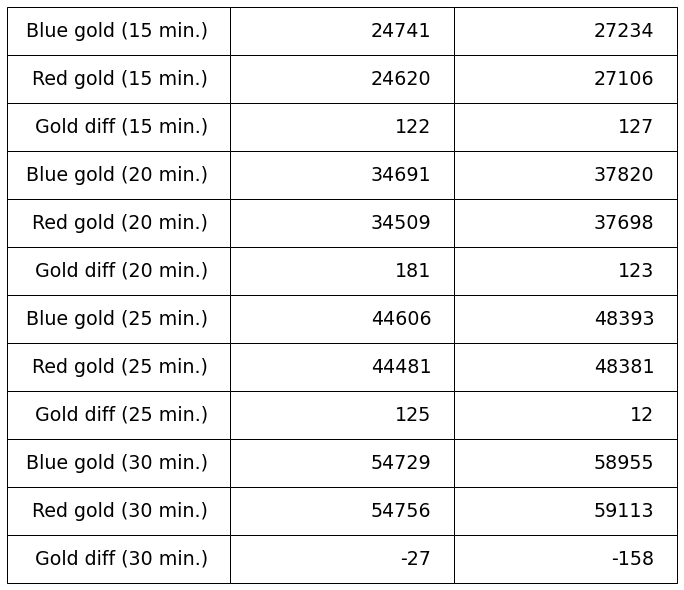

In [9]:
# create table
fig, ax = plt.subplots()

table_data= [
    ['Blue gold (15 min.)', round(bronze15['blue_gold'].mean()), round(diamond15['blue_gold'].mean())],
    ['Red gold (15 min.)', round(bronze15['red_gold'].mean()), round(diamond15['red_gold'].mean())],
    ['Gold diff (15 min.)', round(bronze15['gold_diff'].mean()), round(diamond15['gold_diff'].mean())],
    ['Blue gold (20 min.)', round(bronze20['blue_gold'].mean()), round(diamond20['blue_gold'].mean())],
    ['Red gold (20 min.)', round(bronze20['red_gold'].mean()), round(diamond20['red_gold'].mean())],
    ['Gold diff (20 min.)', round(bronze20['gold_diff'].mean()), round(diamond20['gold_diff'].mean())],
    ['Blue gold (25 min.)', round(bronze25['blue_gold'].mean()), round(diamond25['blue_gold'].mean())],
    ['Red gold (25 min.)', round(bronze25['red_gold'].mean()), round(diamond25['red_gold'].mean())],
    ['Gold diff (25 min.)', round(bronze25['gold_diff'].mean()), round(diamond25['gold_diff'].mean())],
    ['Blue gold (30 min.)', round(bronze30['blue_gold'].mean()), round(diamond30['blue_gold'].mean())],
    ['Red gold (30 min.)', round(bronze30['red_gold'].mean()), round(diamond30['red_gold'].mean())],
    ['Gold diff (30 min.)', round(bronze30['gold_diff'].mean()), round(diamond30['gold_diff'].mean())],
    
]

table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(24)
table.scale(2,4)
ax.axis('off')

plt.show()

Diamond players tend to have more gold than bronze players wheter they are on the blue team or red team. This gap between the diamond and bronze players increases a little bit when the match length increases but not by a whole lot. Once again, there are no differences between players on the red and blue team since players will usually be matched with players who are around their level. Diamond players making more gold makes sense since they are more experienced in the game. 

## Part c  [10 pts]

Maybe looking at winners and losers aggregated together isnt the best idea. Lets see how gold differences vary between winners and losers (over time and between bronze and diamond). Perhaps the gold accumulation and the gold lead (gold diff) is different for bronze and diamond players?

1. Create 8 subfigures in a 2x4 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_win, blue_gold, and gold_diff
3. In each subfigure plot two histograms: one for diamond players and one for bronze players only in the cases where blue team won (`blue_win == 1`). Make each histogram transparent (alpha = 0.5) since they will overlap. Label the histograms.
5. Create table that clearly displays the mean of each histogram for each of the eight subfigures. The table should be 8x3, each row is a subfigure, column 1 contains the title of the subfigure, column 2 contains the bronze mean, and column 3 contains the diamond mean.
4. Comment on any similarities or differences you notice overall between diamond and bronze players or over time. Make sure to answer: Does the gold advantage (average value of gold_diff) grow over time? Is there a difference between bronze and diamond players? I.e are diamond players typically "more ahead"? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient. 


In [10]:
diamond15 = diamond15[diamond15['blue_win'] == 1]
diamond20 = diamond20[diamond20['blue_win'] == 1]
diamond25 = diamond25[diamond25['blue_win'] == 1]
diamond30 = diamond30[diamond30['blue_win'] == 1]

bronze15 = bronze15[bronze15['blue_win'] == 1]
bronze20 = bronze20[bronze20['blue_win'] == 1]
bronze25 = bronze25[bronze25['blue_win'] == 1]
bronze30 = bronze30[bronze30['blue_win'] == 1]

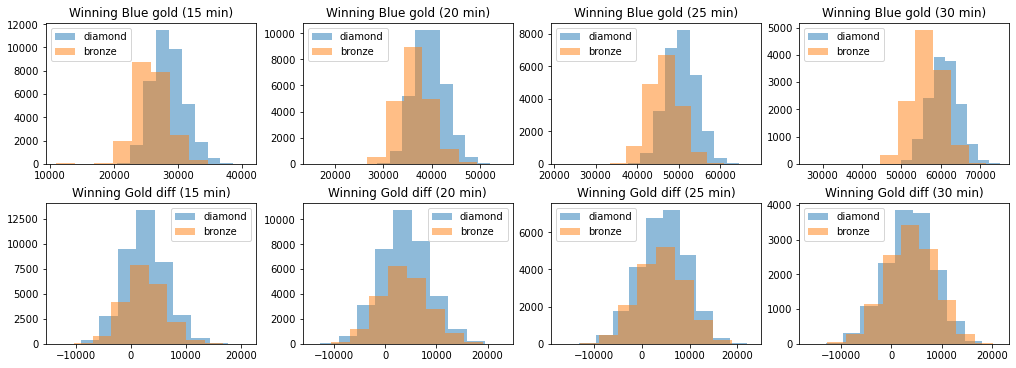

In [11]:
fig, ax = plt.subplots(2, 4, constrained_layout = True, figsize = (14, 5))

# blue gold distribution (winners only)
ax[0,0].set_title('Winning Blue gold (15 min)')
ax[0,0].hist(diamond15['blue_gold'], label = 'diamond', alpha = 0.5)
ax[0,0].hist(bronze15['blue_gold'], label = 'bronze', alpha = 0.5)
ax[0,0].legend()

ax[0,1].set_title('Winning Blue gold (20 min)')
ax[0,1].hist(diamond20['blue_gold'], label = 'diamond', alpha = 0.5)
ax[0,1].hist(bronze20['blue_gold'], label = 'bronze', alpha = 0.5)
ax[0,1].legend()

ax[0,2].set_title('Winning Blue gold (25 min)')
ax[0,2].hist(diamond25['blue_gold'], label = 'diamond', alpha = 0.5)
ax[0,2].hist(bronze25['blue_gold'], label = 'bronze', alpha = 0.5)
ax[0,2].legend()

ax[0,3].set_title('Winning Blue gold (30 min)')
ax[0,3].hist(diamond30['blue_gold'], label = 'diamond', alpha = 0.5)
ax[0,3].hist(bronze30['blue_gold'], label = 'bronze', alpha = 0.5)
ax[0,3].legend()

# gold diff distribution (winners only)
ax[1,0].set_title('Winning Gold diff (15 min)')
ax[1,0].hist(diamond15['gold_diff'], label = 'diamond', alpha = 0.5)
ax[1,0].hist(bronze15['gold_diff'], label = 'bronze', alpha = 0.5)
ax[1,0].legend()

ax[1,1].set_title('Winning Gold diff (20 min)')
ax[1,1].hist(diamond20['gold_diff'], label = 'diamond', alpha = 0.5)
ax[1,1].hist(bronze20['gold_diff'], label = 'bronze', alpha = 0.5)
ax[1,1].legend()

ax[1,2].set_title('Winning Gold diff (25 min)')
ax[1,2].hist(diamond25['gold_diff'], label = 'diamond', alpha = 0.5)
ax[1,2].hist(bronze25['gold_diff'], label = 'bronze', alpha = 0.5)
ax[1,2].legend()

ax[1,3].set_title('Winning Gold diff (30 min)')
ax[1,3].hist(diamond30['gold_diff'], label = 'diamond', alpha = 0.5)
ax[1,3].hist(bronze30['gold_diff'], label = 'bronze', alpha = 0.5)
ax[1,3].legend()

plt.show()

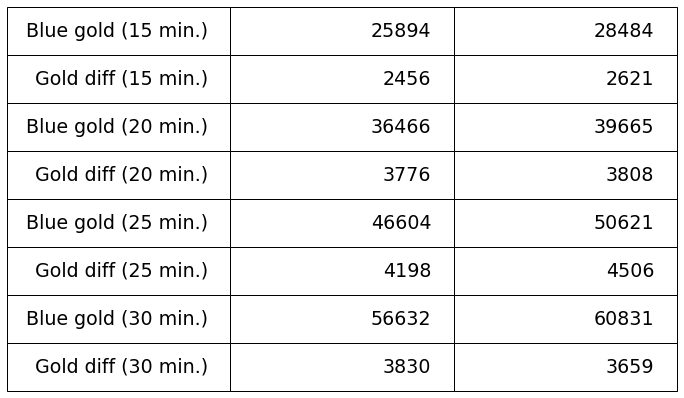

In [12]:
# create table
fig, ax = plt.subplots()

table_data= [
    ['Blue gold (15 min.)', round(bronze15['blue_gold'].mean()), round(diamond15['blue_gold'].mean())],
    ['Gold diff (15 min.)', round(bronze15['gold_diff'].mean()), round(diamond15['gold_diff'].mean())],
    ['Blue gold (20 min.)', round(bronze20['blue_gold'].mean()), round(diamond20['blue_gold'].mean())],
    ['Gold diff (20 min.)', round(bronze20['gold_diff'].mean()), round(diamond20['gold_diff'].mean())],
    ['Blue gold (25 min.)', round(bronze25['blue_gold'].mean()), round(diamond25['blue_gold'].mean())],
    ['Gold diff (25 min.)', round(bronze25['gold_diff'].mean()), round(diamond25['gold_diff'].mean())],
    ['Blue gold (30 min.)', round(bronze30['blue_gold'].mean()), round(diamond30['blue_gold'].mean())],
    ['Gold diff (30 min.)', round(bronze30['gold_diff'].mean()), round(diamond30['gold_diff'].mean())], 
]

table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(24)
table.scale(2,4)
ax.axis('off')

plt.show()

When blue team wins, diamond players still will obtain more gold than bronze players. The gold difference or lead does not seem to differ much between diamond and bronze players. Overall, diamond players accumulate more gold on average but their gold lead does not differ too much from bronze players. 

## Part d  [10 pts]

There is a persistent belief that the blue team has an advantage, i.e. blue team wins more often than red team.

For each stage of the game (15, 20, 25, 30 minutes) and for both diamond and bronze players compute the win percentage of the blue team (fraction of times that blue_win == 1).

1. Plot two lines (label them) indicating the percent of the time blue wins. X-axis is match time (15, 20, 25, 30 minutes) and y-axis is win percentage of blue team.
2. One line shows the win percentage of blue for diamond players
3. The other line shows the win percentage of blue for bronze players
4. Label the axis and title the plot appropriately.
5. Comment on if there are any systematic similarities and differences between the two curves. Make sure to answer: Does blue team have an advantage (higher than 50% win percentage)? Is there a difference between diamond and bronze? Does the chance blue wins change over time? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [13]:
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('data/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('data/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('data/timeline_DIAMOND_30.csv', index_col = 0)

bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('data/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('data/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('data/timeline_BRONZE_30.csv', index_col = 0)

In [14]:
diamond_blue_win_15 = len(diamond15[diamond15['blue_win'] == 1]) / len(diamond15['blue_win']) 
print(diamond_blue_win_15)
diamond_blue_win_20 = len(diamond20[diamond20['blue_win'] == 1]) / len(diamond20['blue_win']) 
print(diamond_blue_win_20)
diamond_blue_win_25 = len(diamond25[diamond25['blue_win'] == 1]) / len(diamond25['blue_win']) 
print(diamond_blue_win_25)
diamond_blue_win_30 = len(diamond30[diamond30['blue_win'] == 1]) / len(diamond30['blue_win']) 
print(diamond_blue_win_30)

bronze_blue_win_15 = len(bronze15[bronze15['blue_win'] == 1]) / len(bronze15['blue_win']) 
print(bronze_blue_win_15)
bronze_blue_win_20 = len(bronze20[bronze20['blue_win'] == 1]) / len(bronze20['blue_win']) 
print(bronze_blue_win_20)
bronze_blue_win_25 = len(bronze25[bronze25['blue_win'] == 1]) / len(bronze25['blue_win'])  
print(bronze_blue_win_25)
bronze_blue_win_30 = len(bronze30[bronze30['blue_win'] == 1]) / len(bronze30['blue_win'])  
print(bronze_blue_win_30)

0.5038554248957904
0.5021470708322188
0.4963287412307804
0.4893260348956551
0.5169827648373837
0.5165020234773647
0.5119357055361358
0.5056896551724138


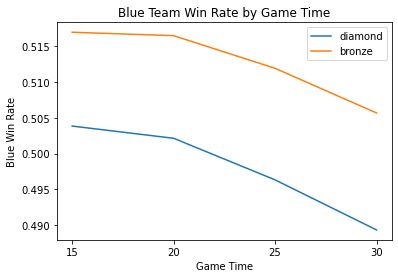

In [15]:
# plot goes here
plt.plot([15, 20, 25, 30], [diamond_blue_win_15, diamond_blue_win_20, diamond_blue_win_25, diamond_blue_win_30], label = 'diamond')
plt.plot([15, 20, 25, 30], [bronze_blue_win_15, bronze_blue_win_20, bronze_blue_win_25, bronze_blue_win_30], label = 'bronze')
plt.xticks(np.arange(15, 31, 5))
plt.xlabel('Game Time')
plt.ylabel('Blue Win Rate')
plt.title('Blue Team Win Rate by Game Time')
plt.legend()
plt.show()

Judging by the win rates of the blue team all being close to 0.5, there does not seem to be any noticable advantage for the blue team. There seems to be more wins on the blue team for bronze players but the difference is negligible. It also seems that the win rate of the blue team decreases very slightly over time. Overall, the plot does not show anyway in which the blue team has an advantage or wins more than the red team. 

# Question 2 -- Predicting Winners

Now we want to further investigate how bronze and diamond players differ. Since bronze and diamond players have different skill levels, we think their games might be played differently. For example, maybe "xp" and gold are more important to bronze players and "wards" are more important for diamond players.

Lets build some models to predict the winner of a match using the provided match information. We will investigate a few different phenomena

1. Is it easier to predict the outcome of bronze or diamond league matches?
2. Do different features determine the winner between bronze and diamond league players?

In [16]:
# as always change the drive to your drive

#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/stat335fall22/Exams/Final

## Part a  [10 pts]

Lets start with the diamond players. We want to classify if blue team will win (`blue_win == 1`), given match information like xp, gold, wards, etc., at the 15, 20, 25, and 30 minute marks. I.e. we need 4 classification models.


1. Import the diamond player data (done for you)
2. Separate the target variable (blue_win) and the feature matrix (everything else) (done for 15 minutes data, you do the rest).
3. Fit __any__ classification model you like to each dataset.
 - Make sure your model has an out of sample `brier < 0.4` and an `accuracy > 0.65` on the 15 minute data. We dont want to use bad models!
 - You need a variable importance measure, so maybe dont choose nearest neighbors. 
 - For logistic regression use the absolute value of the coefficients as variable importance. 
 - For decision trees or random forest use the feature_importance_ score. 
 - Make sure to fit the same model type at each time time point so that youre results are comparable. I.e. use all logistic regression or all random forests etc. Do not mix and match.

In [17]:
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('data/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('data/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('data/timeline_DIAMOND_30.csv', index_col = 0)

In [18]:
# 15 minutes
x15 = diamond15.drop(['blue_win'], axis=1)
y15 = diamond15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

# recommend keeping a consistent naming scheme

# 20 minutes
x20 = diamond20.drop(['blue_win'], axis=1)
y20 = diamond20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

# 25 minutes
x25 = diamond25.drop(['blue_win'], axis=1)
y25 = diamond25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)

# 30 minutes
x30 = diamond30.drop(['blue_win'], axis=1)
y30 = diamond30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

In [19]:
# define and fit models
lm = LogisticRegression()
lm.fit(x15_train, y15_train)
lm.fit(x20_train, y20_train)
lm.fit(x25_train, y25_train)
lm.fit(x30_train, y30_train)

LogisticRegression()

## Part b  [10 pts]

Compute the brier score and accuracy of each model (4 models in total) on the test set. 

1. Compute and print the brier score and accruacy of each model (round to 3 decimal places)
2. Display the brier score and accuracy in a single table. The table should be 4x3. Each row is a time point (15, 20, 25, or 30 minutes). Column 1 is the time point as a string, column 2 is the brier score, column 3 is the accuracy. For example row 1 might look like `15 Minutes, 0.351, 0.825`.
2. We might naively expect that its easier to predict the winner the longer the match goes on. Comment on: Which time period is the hardest to predict? Which time period is the easiest to predict? Do matches become more predictable (better scores) over time? Use the computed Brier and accuracy scores to inform your response.

In [20]:
# predict if blue wins
y15_hat = lm.predict(x15_test)
y20_hat = lm.predict(x20_test)
y25_hat = lm.predict(x25_test)
y30_hat = lm.predict(x30_test)

# predict probabilities of blue winning and losing
p15_hat = lm.predict_proba(x15_test)
p20_hat = lm.predict_proba(x20_test)
p25_hat = lm.predict_proba(x25_test)
p30_hat = lm.predict_proba(x30_test)

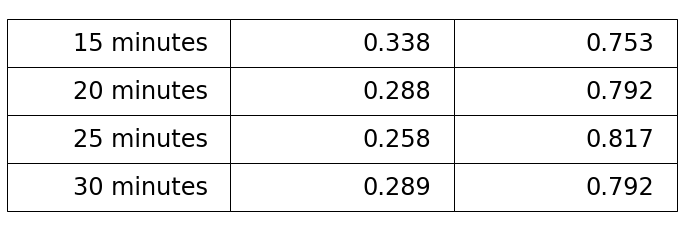

In [21]:
# create brier and accuracy table
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots()

table_data= [
    ['15 minutes', np.round(brier_score(y15_test, p15_hat), 3), np.round(accuracy_score(y15_test, y15_hat), 3)],
    ['20 minutes', np.round(brier_score(y20_test, p20_hat), 3), np.round(accuracy_score(y20_test, y20_hat), 3)],
    ['25 minutes', np.round(brier_score(y25_test, p25_hat), 3), np.round(accuracy_score(y25_test, y25_hat), 3)],
    ['30 minutes', np.round(brier_score(y30_test, p30_hat), 3), np.round(accuracy_score(y30_test, y30_hat), 3)]
]

table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(24)
table.scale(2,4)
ax.axis('off')

plt.show()

The hardest time period to predict seems to be 15 min as it has the highest brier score and the lowest accuracy. The easiest time period to predict is 25 since it has the lowest brier score and the highest accuracy. It does seem like the accuracy score increases over time until 25 minutes, same with brier score, it decreases until 25 minutes then increases. It seems that time matters for accurate predictions up until a certain length which in this case is 25 minutes. 

## Part c  [10 pts]

Now plot the ROC curve for each model in a single figure. Make sure each line is appropriately labeled. 

1. Create a single ROC curve plot
2. Compute and print the AUC values for each model.
3. Based on the AUC values, comment on: Which time period is the hardest to predict? Does that make sense? Which time period is the easiest to predict? Does that make sense? Do matches become more predictable (better scores) over time? Use the computed Brier and accuracy scores to inform your response. Do these results corroborate your findings in part b? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [22]:
# compute ROC curves and AUC values
fpr_15, tpr_15, thresholds = roc_curve(y15_test, p15_hat[:,1])
fpr_20, tpr_20, thresholds = roc_curve(y20_test, p20_hat[:,1])
fpr_25, tpr_25, thresholds = roc_curve(y25_test, p25_hat[:,1])
fpr_30, tpr_30, thresholds = roc_curve(y30_test, p30_hat[:,1])

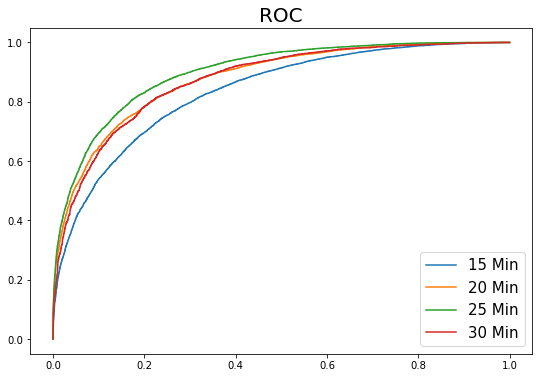

In [23]:
# plot ROC curves
plt.figure(figsize = (9, 6))
plt.plot(fpr_15, tpr_15, label = '15 Min')
plt.plot(fpr_20, tpr_20, label = '20 Min')
plt.plot(fpr_25, tpr_25, label = '25 Min')
plt.plot(fpr_30, tpr_30, label = '30 Min')
plt.title('ROC', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [24]:
print('15 Min:', metrics.auc(fpr_15, tpr_15))
print('20 Min:', metrics.auc(fpr_20, tpr_20))
print('25 Min:', metrics.auc(fpr_25, tpr_25))
print('30 Min:', metrics.auc(fpr_30, tpr_30))

15 Min: 0.8345018399637887
20 Min: 0.8777513470912701
25 Min: 0.8991317559283772
30 Min: 0.8737442841051405


Overall the AUC scores tell a similar story to the Brier and Accuracy scores. The hardest time to predict is at 15 minutes while the easiest time to predict is 25 minutes. Predictions also become easier over time up until 25 minutes then decreases a little from 25 to 30 minutes. 

## Part d  [10 pts]

Now we want to know which features are important for predicting the winner. 


1. Print the feature importance of each feature in a table format. Each row should include the feature name and the importance score for each model. Sort this table by the feature importances for the 15 minute mark model.
2. If you used logistic regression use the coefficients (coefs_) as the importance measure
3. If you used decision trees or random forests use the feature importance score (feature_importances_) as the importance measure
4. Comment on: What are the top 5 most important features for predicting the winner of the game at the 15, 20, 25, and 30 minute marks of the match. Are these variables the same? Do any features become more or less important over time? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [25]:
# create table here
feat_importance = pd.DataFrame({'Feature': x15.columns,'Logistic Regression Importance': lm.coef_[0],})
feat_importance = feat_importance.sort_values('Logistic Regression Importance', ascending=False)
feat_importance

,Feature,Logistic Regression Importance
3,gold_diff,1.243834e-04
6,xp_diff,8.363774e-05
1,blue_gold,6.049831e-05
4,blue_xp,4.398807e-05
16,kill_diff,2.230256e-07
20,turret_diff,1.770515e-07
9,ward_placed_diff,1.430470e-07
7,blue_ward_placed,9.548903e-08
14,blue_kills,9.329880e-08
18,blue_turrets,8.892993e-08


The top 5 most important features for predicting the winner are `gold_diff`, `xp_diff`, `blue_gold`, `blue_xp`, and `kill_diff`. The game time does not really have an effect on the features. Overall, gold, xp, and kills seem to be the factors that affect which team wins in a game the most. 

## Part e  [10 pts]

Now lets build models for the bronze players. Use the same model as you did for diamond players so that the results are comparable. We'll skip through a bit this time. By "same" I mean if you used logistic regression before then use it again. You of course have to refit the models to the bronze data. You should again have 4 models.

1. Compute the brier score and accuracy of each model (4 models in total) on the test set. 

2. Display the brier score and accuracy in a single table. The table should be 4x3. Each row is a time point (15, 20, 25, or 30 minutes). Column 1 is the time point as a string, column 2 is the brier score, column 3 is the accuracy.

3. Comment on: Do matches get easier to predict over time? Also are the brier scores for bronze players lower or higher than diamond on average? I.e. is it easier to predict the outcome of a bronze game or a diamond game?

In [26]:
bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('data/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('data/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('data/timeline_BRONZE_30.csv', index_col = 0)

In [27]:
# 15 minutes
x15 = bronze15.drop(['blue_win'], axis=1)
y15 = bronze15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

# recommend keeping a consistent naming scheme

# 20 minutes
x20 = bronze20.drop(['blue_win'], axis=1)
y20 = bronze20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

# 25 minutes
x25 = bronze25.drop(['blue_win'], axis=1)
y25 = bronze25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)

# 30 minutes
x30 = bronze30.drop(['blue_win'], axis=1)
y30 = bronze30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

In [28]:
# define and fit models
lm = LogisticRegression()
lm.fit(x15_train, y15_train)
lm.fit(x20_train, y20_train)
lm.fit(x25_train, y25_train)
lm.fit(x30_train, y30_train)

LogisticRegression()

In [29]:
# predict if blue wins
y15_hat = lm.predict(x15_test)
y20_hat = lm.predict(x20_test)
y25_hat = lm.predict(x25_test)
y30_hat = lm.predict(x30_test)

# predict probabilities of blue winning and losing
p15_hat = lm.predict_proba(x15_test)
p20_hat = lm.predict_proba(x20_test)
p25_hat = lm.predict_proba(x25_test)
p30_hat = lm.predict_proba(x30_test)

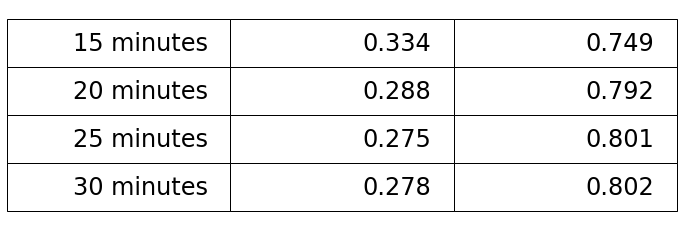

In [30]:
# create brier and accuracy table
fig, ax = plt.subplots()

table_data= [
    ['15 minutes', np.round(brier_score(y15_test, p15_hat), 3), np.round(accuracy_score(y15_test, y15_hat), 3)],
    ['20 minutes', np.round(brier_score(y20_test, p20_hat), 3), np.round(accuracy_score(y20_test, y20_hat), 3)],
    ['25 minutes', np.round(brier_score(y25_test, p25_hat), 3), np.round(accuracy_score(y25_test, y25_hat), 3)],
    ['30 minutes', np.round(brier_score(y30_test, p30_hat), 3), np.round(accuracy_score(y30_test, y30_hat), 3)]
]

table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(24)
table.scale(2,4)
ax.axis('off')

plt.show()

Simarlarly to the brier and accuracy scores for Diamond players, the model becomes easier to predict over time until around 25 minutes. There isn't a huge difference in the brier scores and sccuracy scores between gold and bronze players so they are just about as easy to predict either way. 

## Part f  [10 pts]

1. Print the feature importance of each feature in a table format. Each row should include the feature name and the importance score for each model. Sort by the feature importances for the 15 minute mark model.
 - If you used logistic regression use the coefficients (coefs_) as the importance measure
 - If you used decision trees or random forests use the feature importance score (feature_importances_) as the importance measure
4. Comment on: What are the top 5 most important features for predicting the winner of the game at the 15, 20, 25, and 30 minute marks of the match. Are these variables the same? Do any features become more or less important over time? How correlated are the feature importances? Use quantitive measures like the correlation matrix to inform your response.
5. Comment on: Are these features the same as the features you found for the diamond players? What, if anything, changed substantially? What are the major similarities and differences between bronze and diamond in terms of feature importance? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [31]:
# create table here
feat_importance = pd.DataFrame({'Feature': x15.columns,'Logistic Regression Importance': lm.coef_[0],})
feat_importance = feat_importance.sort_values('Logistic Regression Importance', ascending=False)
feat_importance


,Feature,Logistic Regression Importance
3,gold_diff,1.643253e-04
1,blue_gold,7.971553e-05
6,xp_diff,6.066974e-05
4,blue_xp,3.311647e-05
9,ward_placed_diff,4.690927e-07
7,blue_ward_placed,2.529701e-07
20,turret_diff,2.501544e-07
16,kill_diff,2.024393e-07
18,blue_turrets,1.230152e-07
14,blue_kills,7.481696e-08


The top 5 features in importance for predicting the winner for bronze players are `gold_diff`, `blue_gold`, `xp_diff`, `blue_xp`, and `ward_placed_diff` (ordered). The top 5 most important features for predicting the winner are `gold_diff`, `xp_diff`, `blue_gold`, `blue_xp`, and `kill_diff` (ordered). Again, the game time does not affect the importance of these features. The biggest difference between bronze and diamond players are that `ward_placed_diff` is in the top 5 important features for determining which team wins the game. Other changes in how important the features are between bronze and diamond players are slight. 